In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
rainfall_dataset=pd.read_csv('Weather Training Data.csv')

In [3]:
rainfall_dataset.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [4]:
rainfall_dataset.isnull().sum()

row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [5]:
rainfall_dataset= rainfall_dataset.dropna()

In [6]:
rainfall_dataset.isnull().sum()

row ID           0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [7]:
rainfall_dataset.shape

(39574, 23)

In [8]:
rainfall_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39574 entries, 4183 to 97410
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         39574 non-null  object 
 1   Location       39574 non-null  object 
 2   MinTemp        39574 non-null  float64
 3   MaxTemp        39574 non-null  float64
 4   Rainfall       39574 non-null  float64
 5   Evaporation    39574 non-null  float64
 6   Sunshine       39574 non-null  float64
 7   WindGustDir    39574 non-null  object 
 8   WindGustSpeed  39574 non-null  float64
 9   WindDir9am     39574 non-null  object 
 10  WindDir3pm     39574 non-null  object 
 11  WindSpeed9am   39574 non-null  float64
 12  WindSpeed3pm   39574 non-null  float64
 13  Humidity9am    39574 non-null  float64
 14  Humidity3pm    39574 non-null  float64
 15  Pressure9am    39574 non-null  float64
 16  Pressure3pm    39574 non-null  float64
 17  Cloud9am       39574 non-null  float64
 18  Cloud3pm

In [9]:
rainfall_dataset['RainToday'].value_counts()

RainToday
No     30777
Yes     8797
Name: count, dtype: int64

In [10]:
rainfall_dataset.replace({"RainToday":{'No':0,'Yes':1}},inplace=True)

In [11]:
rainfall_dataset.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4183,Row4262,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
4185,Row4264,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0,N,...,26.0,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,0,0
4186,Row4265,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,...,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,0,0
4187,Row4266,Cobar,16.1,34.2,0.0,14.6,13.2,SE,37.0,SE,...,25.0,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,0,0
4188,Row4267,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0,ENE,...,46.0,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,0,0


In [12]:
rainfall_dataset.select_dtypes(include="float64").columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [13]:
rainfall_dataset = rainfall_dataset.astype({"MinTemp":'str', "MaxTemp":'str', "Rainfall":'str', "Evaporation":'str',"Sunshine":'str',
       "WindGustSpeed":'str', "WindSpeed9am":'str', "WindSpeed3pm":'str', "Humidity9am":'str',
       "Humidity3pm":'str', "Pressure9am":'str', "Pressure3pm":'str', "Cloud9am":'str', "Cloud3pm":'str',
       "Temp9am":'str', "Temp3pm":'str'})

print(rainfall_dataset.dtypes)

row ID           object
Location         object
MinTemp          object
MaxTemp          object
Rainfall         object
Evaporation      object
Sunshine         object
WindGustDir      object
WindGustSpeed    object
WindDir9am       object
WindDir3pm       object
WindSpeed9am     object
WindSpeed3pm     object
Humidity9am      object
Humidity3pm      object
Pressure9am      object
Pressure3pm      object
Cloud9am         object
Cloud3pm         object
Temp9am          object
Temp3pm          object
RainToday         int64
RainTomorrow      int64
dtype: object


In [14]:
rainfall_dataset.drop('row ID',axis=1,inplace=True)

In [15]:
rainfall_dataset.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4183,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
4185,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0,N,WNW,...,26.0,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,0,0
4186,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,SSE,...,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,0,0
4187,Cobar,16.1,34.2,0.0,14.6,13.2,SE,37.0,SE,S,...,25.0,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,0,0
4188,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0,ENE,WSW,...,46.0,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,0,0


In [16]:
rainfall_dataset['WindGustDir'].value_counts()

WindGustDir
E      3168
N      2971
W      2905
SW     2872
ENE    2813
SE     2772
SSW    2742
WSW    2642
S      2517
SSE    2345
ESE    2290
NE     2215
WNW    2108
NW     1814
NNE    1805
NNW    1595
Name: count, dtype: int64

In [17]:
rainfall_dataset['WindGustDir'].value_counts()

WindGustDir
E      3168
N      2971
W      2905
SW     2872
ENE    2813
SE     2772
SSW    2742
WSW    2642
S      2517
SSE    2345
ESE    2290
NE     2215
WNW    2108
NW     1814
NNE    1805
NNW    1595
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label_encoder = LabelEncoder()

In [20]:
rainfall_dataset['WindGustDir']=label_encoder.fit_transform(rainfall_dataset["WindGustDir"])

In [21]:
rainfall_dataset['WindDir9am']=label_encoder.fit_transform(rainfall_dataset["WindDir9am"])

In [22]:
rainfall_dataset['WindDir3pm']=label_encoder.fit_transform(rainfall_dataset["WindDir3pm"])

In [23]:
rainfall_dataset['Location']=label_encoder.fit_transform(rainfall_dataset["Location"])

In [24]:
rainfall_dataset.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4183,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
4185,4,27.1,36.1,0.0,13.0,0.0,3,43.0,3,14,...,26.0,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,0,0
4186,4,23.3,34.0,0.0,9.8,12.6,11,41.0,8,10,...,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,0,0
4187,4,16.1,34.2,0.0,14.6,13.2,9,37.0,9,8,...,25.0,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,0,0
4188,4,19.0,35.5,0.0,12.0,12.3,1,48.0,1,15,...,46.0,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,0,0


In [25]:
rainfall_dataset['Location'].value_counts()

Location
15    2146
6     2121
16    2107
9     2083
1     2050
20    2009
23    1910
10    1832
12    1738
2     1736
13    1699
22    1684
21    1668
0     1545
14    1414
7     1353
11    1332
17    1327
8     1324
25    1225
19    1172
18    1148
5      976
24     874
3      727
4      374
Name: count, dtype: int64

<Axes: xlabel='Location'>

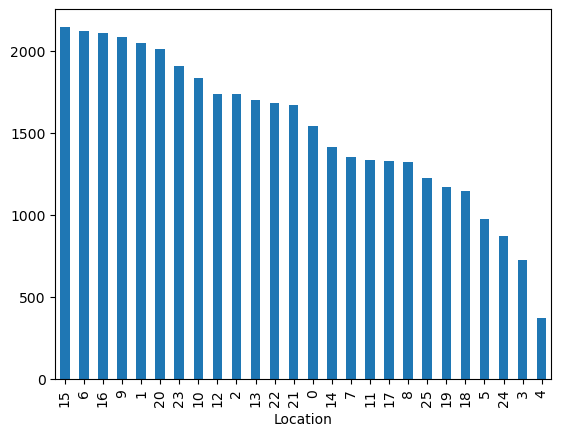

In [26]:
rainfall_dataset['Location'].value_counts().plot(kind='bar')

<Axes: xlabel='RainToday'>

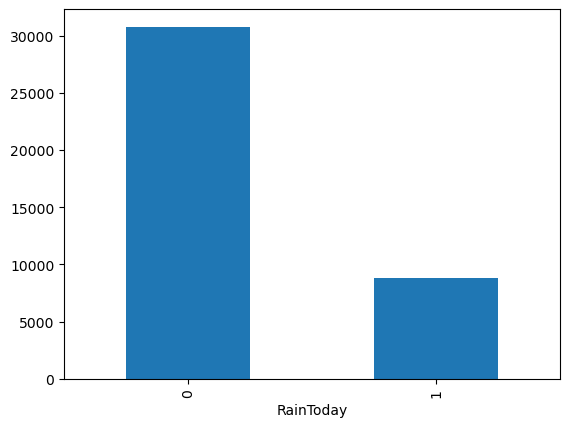

In [27]:
rainfall_dataset['RainToday'].value_counts().plot(kind='bar')

<Axes: xlabel='RainTomorrow'>

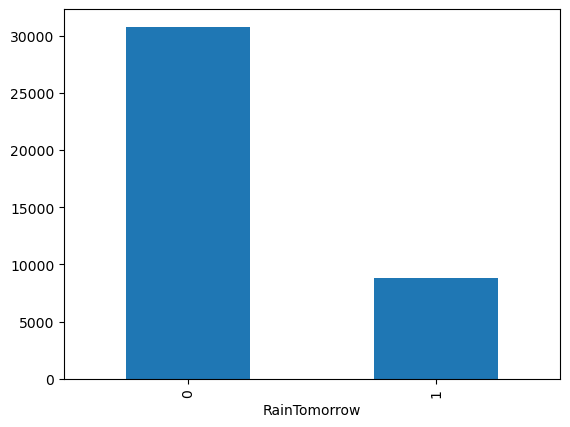

In [28]:
rainfall_dataset['RainTomorrow'].value_counts().plot(kind='bar')

In [29]:
X= rainfall_dataset.drop(['RainTomorrow','Location'],axis=1)
Y= rainfall_dataset['RainTomorrow']

In [30]:
print(X)
print(Y)

      MinTemp MaxTemp Rainfall Evaporation Sunshine  WindGustDir  \
4183     17.9    35.2      0.0        12.0     12.3           11   
4185     27.1    36.1      0.0        13.0      0.0            3   
4186     23.3    34.0      0.0         9.8     12.6           11   
4187     16.1    34.2      0.0        14.6     13.2            9   
4188     19.0    35.5      0.0        12.0     12.3            1   
...       ...     ...      ...         ...      ...          ...   
97406    21.9    33.0      0.0         5.2     10.9            0   
97407    19.3    33.4      0.0         6.0     11.0            1   
97408    21.2    32.6      0.0         7.6      8.6            0   
97409    20.7    32.8      0.0         5.6     11.0            0   
97410    20.2    31.7      0.0         5.6     10.7            1   

      WindGustSpeed  WindDir9am  WindDir3pm WindSpeed9am WindSpeed3pm  \
4183           48.0           1          12          6.0         20.0   
4185           43.0           3      

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [32]:
print(Y.shape, Y_train.shape, Y_test.shape)

(39574,) (31659,) (7915,)


In [33]:
print(X.shape, X_train.shape, X_test.shape)

(39574, 20) (31659, 20) (7915, 20)


In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model = RandomForestClassifier()

In [36]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [37]:
X_test_prediction = model.predict(X_test)

data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [38]:
print('Accuracy:', data_accuracy)

Accuracy: 0.8563487049905243
